https://www.kaggle.com/datasets/moazeldsokyx/heart-disease/data

### Library Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Imports

In [4]:
train_data = pd.read_csv('train.csv')
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
test_data = pd.read_csv('test.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Information

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Exploratory Data Analysis

In [8]:
df = pd.concat([train_data, test_data], axis = 0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: >

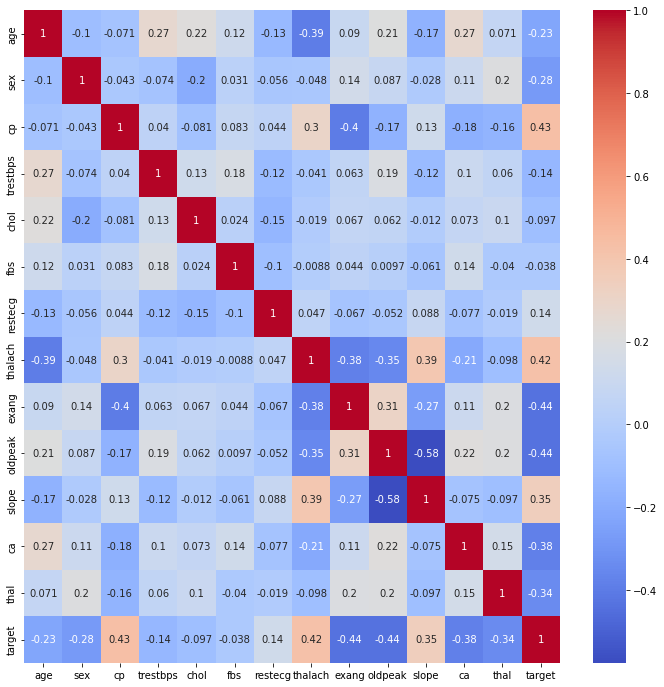

In [9]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

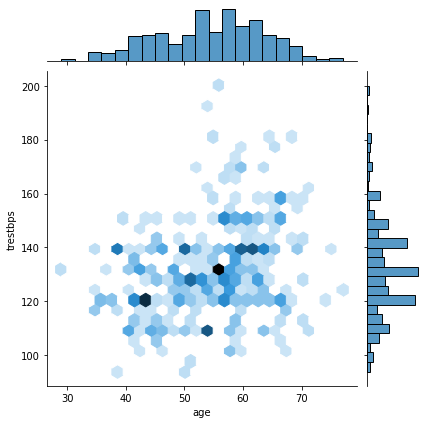

In [10]:
sns.jointplot(df, x = 'age', y = 'trestbps', kind = 'hex')

<Axes: title={'center': 'Cholesterol'}, xlabel='chol', ylabel='Count'>

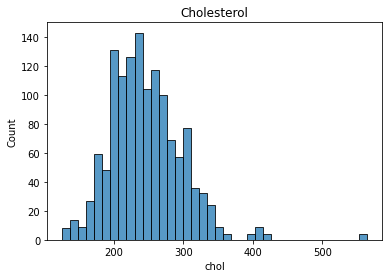

In [11]:
plt.title('Cholesterol')
sns.histplot(df['chol'])

Text(0.5, 1.0, 'Age vs Resting Blood Pressure')

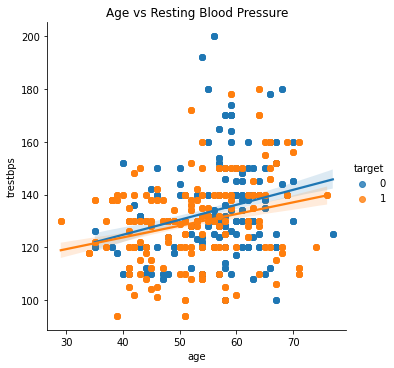

In [12]:
sns.lmplot(df, x = 'age', y = 'trestbps', hue = 'target')
plt.title('Age vs Resting Blood Pressure')

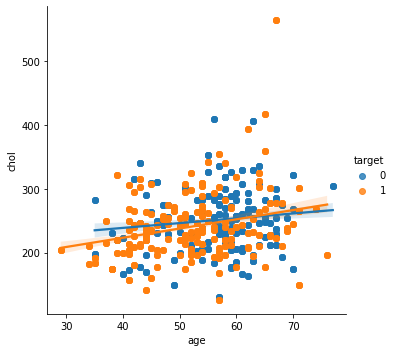

In [13]:
sns.lmplot(df, x = 'age', y = 'chol', hue = 'target')

<Axes: xlabel='target', ylabel='trestbps'>

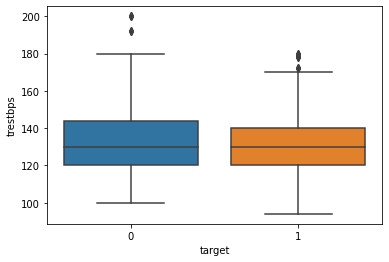

In [14]:
sns.boxplot(df, x = 'target', y = 'trestbps')

<Axes: xlabel='cp', ylabel='count'>

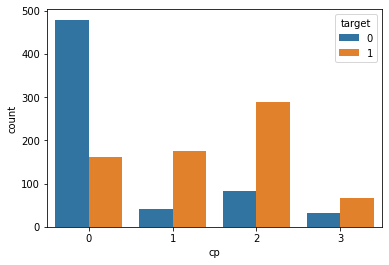

In [15]:
sns.countplot(df, x = 'cp', hue = 'target')

<Axes: xlabel='sex', ylabel='count'>

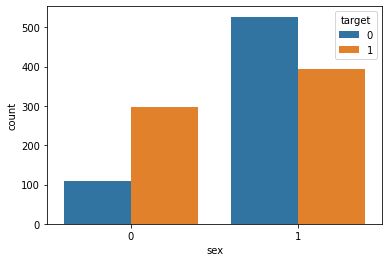

In [16]:
sns.countplot(df, x = 'sex', hue = 'target')

### Preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   cp        1328 non-null   int64  
 3   trestbps  1328 non-null   int64  
 4   chol      1328 non-null   int64  
 5   fbs       1328 non-null   int64  
 6   restecg   1328 non-null   int64  
 7   thalach   1328 non-null   int64  
 8   exang     1328 non-null   int64  
 9   oldpeak   1328 non-null   float64
 10  slope     1328 non-null   int64  
 11  ca        1328 non-null   int64  
 12  thal      1328 non-null   int64  
 13  target    1328 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 155.6 KB


In [18]:
df['chest_pain'] = df['cp'].apply(lambda x: f'cp_type_{x}')
df[['chest_pain', 'cp']]

,chest_pain,cp
0,cp_type_0,0
1,cp_type_0,0
2,cp_type_0,0
3,cp_type_0,0
4,cp_type_0,0
...,...,...
298,cp_type_0,0
299,cp_type_3,3
300,cp_type_0,0
301,cp_type_0,0


In [19]:
chest_pain_features = pd.get_dummies(df['chest_pain'], drop_first = True)
chest_pain_features

,cp_type_1,cp_type_2,cp_type_3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
298,0,0,0
299,0,0,1
300,0,0,0
301,0,0,0


In [20]:
df['restecg_type'] = df['restecg'].apply(lambda x: f'restect_type_{x}')
df[['restecg_type', 'restecg']]

,restecg_type,restecg
0,restect_type_1,1
1,restect_type_0,0
2,restect_type_1,1
3,restect_type_1,1
4,restect_type_1,1
...,...,...
298,restect_type_1,1
299,restect_type_1,1
300,restect_type_1,1
301,restect_type_1,1


In [21]:
restecg_type_features = pd.get_dummies(df['restecg_type'], drop_first = True)
restecg_type_features

,restect_type_1,restect_type_2
0,1,0
1,0,0
2,1,0
3,1,0
4,1,0
...,...,...
298,1,0
299,1,0
300,1,0
301,1,0


In [22]:
df['ca'].value_counts()

0    753
1    291
2    172
3     89
4     23
Name: ca, dtype: int64

In [23]:
df['thal'].value_counts()

2    710
3    527
1     82
0      9
Name: thal, dtype: int64

In [24]:
df['thal_type'] = df['thal'].apply(lambda x: f'thal_type_{x}')
df[['thal_type', 'thal']]

,thal_type,thal
0,thal_type_3,3
1,thal_type_3,3
2,thal_type_3,3
3,thal_type_3,3
4,thal_type_2,2
...,...,...
298,thal_type_3,3
299,thal_type_3,3
300,thal_type_3,3
301,thal_type_3,3


In [25]:
thal_type_features = pd.get_dummies(df['thal_type'], drop_first = True)
thal_type_features

,thal_type_1,thal_type_2,thal_type_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
298,0,0,1
299,0,0,1
300,0,0,1
301,0,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 302
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1328 non-null   int64  
 1   sex           1328 non-null   int64  
 2   cp            1328 non-null   int64  
 3   trestbps      1328 non-null   int64  
 4   chol          1328 non-null   int64  
 5   fbs           1328 non-null   int64  
 6   restecg       1328 non-null   int64  
 7   thalach       1328 non-null   int64  
 8   exang         1328 non-null   int64  
 9   oldpeak       1328 non-null   float64
 10  slope         1328 non-null   int64  
 11  ca            1328 non-null   int64  
 12  thal          1328 non-null   int64  
 13  target        1328 non-null   int64  
 14  chest_pain    1328 non-null   object 
 15  restecg_type  1328 non-null   object 
 16  thal_type     1328 non-null   object 
dtypes: float64(1), int64(13), object(3)
memory usage: 186.8+ KB


In [27]:
df.drop(['cp', 'chest_pain', 'restecg', 'restecg_type', 'thal', 'thal_type'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   trestbps  1328 non-null   int64  
 3   chol      1328 non-null   int64  
 4   fbs       1328 non-null   int64  
 5   thalach   1328 non-null   int64  
 6   exang     1328 non-null   int64  
 7   oldpeak   1328 non-null   float64
 8   slope     1328 non-null   int64  
 9   ca        1328 non-null   int64  
 10  target    1328 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 124.5 KB


In [28]:
df = pd.concat([df, chest_pain_features, restecg_type_features, thal_type_features], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 302
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1328 non-null   int64  
 1   sex             1328 non-null   int64  
 2   trestbps        1328 non-null   int64  
 3   chol            1328 non-null   int64  
 4   fbs             1328 non-null   int64  
 5   thalach         1328 non-null   int64  
 6   exang           1328 non-null   int64  
 7   oldpeak         1328 non-null   float64
 8   slope           1328 non-null   int64  
 9   ca              1328 non-null   int64  
 10  target          1328 non-null   int64  
 11  cp_type_1       1328 non-null   uint8  
 12  cp_type_2       1328 non-null   uint8  
 13  cp_type_3       1328 non-null   uint8  
 14  restect_type_1  1328 non-null   uint8  
 15  restect_type_2  1328 non-null   uint8  
 16  thal_type_1     1328 non-null   uint8  
 17  thal_type_2     1328 non-null   ui

### Train Test Split

In [29]:
X = df.drop('target', axis = 1)
y = df['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.328, random_state = 15)

### Training and Testing using Naive Bayes

In [31]:
nb = CategoricalNB()

In [32]:
nb.fit(X_train, y_train)

CategoricalNB()

In [33]:
predictions = nb.predict(X_test)
predictions

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [34]:
print(confusion_matrix(y_test, predictions))

[[191  29]
 [ 25 191]]


In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       220
           1       0.87      0.88      0.88       216

    accuracy                           0.88       436
   macro avg       0.88      0.88      0.88       436
weighted avg       0.88      0.88      0.88       436



### Using Decision Tree

In [36]:
dtc = DecisionTreeClassifier()

In [37]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
predictions = dtc.predict(X_test)
predictions

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [39]:
print(confusion_matrix(y_test, predictions))

[[215   5]
 [  0 216]]


In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       220
           1       0.98      1.00      0.99       216

    accuracy                           0.99       436
   macro avg       0.99      0.99      0.99       436
weighted avg       0.99      0.99      0.99       436



### Using Random Forest

In [41]:
rfc = RandomForestClassifier()

In [42]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
predictions = rfc.predict(X_test)
predictions

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [44]:
print(confusion_matrix(y_test, predictions))

[[215   5]
 [  0 216]]


In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       220
           1       0.98      1.00      0.99       216

    accuracy                           0.99       436
   macro avg       0.99      0.99      0.99       436
weighted avg       0.99      0.99      0.99       436

